In [6]:
from numpy import concatenate
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation


# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)

# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)

# create the training dataset input
X_train_mixed = concatenate((X_train_lab, X_test_unlab))

# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]

# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))



# define model
model = LabelPropagation()
# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)
# make predictions on hold out test set
yhat = model.predict(X_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 85.600


In [9]:
pd.DataFrame(y_train_mixed)

,0
0,0
1,0
2,1
3,1
4,0
...,...
495,-1
496,-1
497,-1
498,-1


In [8]:
pd.DataFrame(X_train_mixed)

,0,1
0,-1.485601,1.498130
1,-2.617807,1.894824
2,-0.012909,1.781371
3,1.369982,1.528273
4,-0.133378,-1.761423
...,...,...
495,-1.651519,0.430953
496,1.298544,-0.970683
497,0.778609,-1.061510
498,-0.372080,-0.919613


In [7]:
import pandas as pd
pd.DataFrame(model.label_distributions_)

,0,1
0,1.000000,0.000000
1,1.000000,0.000000
2,0.000000,1.000000
3,0.000000,1.000000
4,1.000000,0.000000
...,...,...
495,0.999046,0.000954
496,0.153115,0.846885
497,0.138845,0.861155
498,0.925916,0.074084


In [7]:
import numpy as np
np.arange(3)

array([0, 1, 2])

([<matplotlib.axis.XTick at 0x7f27b9431700>,
 [Text(0, 0, "['11', 'dsf1']"),
  Text(1, 0, "['22', 'dsf2']"),
  Text(2, 0, "['33', 'dsf3']")])

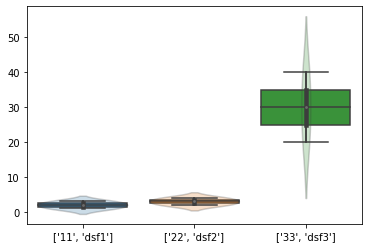

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
res = [
    [1,2,3],
    [2,3,4],
    [20,30,40]
]
params = [
    ["11", "dsf1"],
    ["22", "dsf2"],
    ["33", "dsf3"]
]
ax1 = sns.boxplot(data=res)
ax2 = sns.violinplot(data=res)

plt.setp(ax2.collections, alpha=.25)
plt.xticks(np.arange(len(params)), params)